## Data Collection and Preliminary Data Analysis (PDA)

In [1]:
# Importing necessary libraries and dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
from sklearn.preprocessing import LabelEncoder
import logging
import warnings
import joblib

In [2]:
zip_path = f"../playground-series-s5e11.zip"

In [3]:
def view_zipped_files(path):
    """
    gets all file names/paths in the zip file
    
    parameters:
        ZipFile(path, "r"): the 'path' variable takes in the zip file and processes
        it using the with ZipFile() method

        printdir(): prints all directories (files) in the zip file
        stores it in 'list' variable in this case

    returns:
        dataframe with file names, modified date and size.
    
    """
    with ZipFile(path, "r") as f:
        list = f.printdir()
        return list
    
view_zipped_files(zip_path)

File Name                                             Modified             Size
sample_submission.csv                          2025-10-28 23:08:48      2291139
test.csv                                       2025-10-28 23:08:48     23021430
train.csv                                      2025-10-28 23:08:50     55988519


In [4]:
def extract_datasets(path):
    """
    reads the target dataset(s) from the listed files
    
    parameters:
        ZipFile(path, "r"): the 'path' variable takes in the zip file and processes
        it using the with ZipFile() method

        open(): opens the selected file name from the zipfile
        read_csv(): is a pandas method to read a csv file, `index_col=0` removes unwanted 


    returns:
        datasets of the selected data (i.e train.csv, test.csv) as train_dt and test_dt respectively
    
    """
    with ZipFile(path, "r") as zip_file:
        with zip_file.open("train.csv") as a:
            train_dt = pd.read_csv(a)
        with zip_file.open("test.csv") as b:
            test_dt = pd.read_csv(b)

        return train_dt, test_dt




In [ ]:
# save returned data from extract_datasets() method
train_df, test_df = extract_datasets(zip_path)

In [6]:
train_df, test_df = train_df.copy(), test_df.copy()

## Preliminary Data Analysis

In [7]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [8]:
test_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [9]:
train_df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [10]:
# drop unnecessary columns (id)
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)


In [11]:
print(train_df.info())
print("--"*40)
print(train_df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB
None
--------------------------------------------------------------------------------
(593994, 12)

In [12]:
print(test_df.info())
print("--"*40)
print(test_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254569 entries, 0 to 254568
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         254569 non-null  float64
 1   debt_to_income_ratio  254569 non-null  float64
 2   credit_score          254569 non-null  int64  
 3   loan_amount           254569 non-null  float64
 4   interest_rate         254569 non-null  float64
 5   gender                254569 non-null  object 
 6   marital_status        254569 non-null  object 
 7   education_level       254569 non-null  object 
 8   employment_status     254569 non-null  object 
 9   loan_purpose          254569 non-null  object 
 10  grade_subgrade        254569 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.4+ MB
None
--------------------------------------------------------------------------------
(254569, 11)


In [13]:
train_df.duplicated().sum()


np.int64(0)

- This reveals that our datasets contains no missingness, no duplicates, and is properly typed
- Thus the data cleaning aspect would be skipped and we move to EDA.

In [14]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


## Exploratory Data Analysis

#### Descriptive Analysis

In [15]:
train_df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
annual_income,593994.000000,48212.202976,26711.942078,6002.430000,27934.400000,46557.680000,60981.320000,393381.740000
debt_to_income_ratio,593994.000000,0.120696,0.068573,0.011000,0.072000,0.096000,0.156000,0.627000
credit_score,593994.000000,680.916009,55.424956,395.000000,646.000000,682.000000,719.000000,849.000000
loan_amount,593994.000000,15020.297629,6926.530568,500.090000,10279.620000,15000.220000,18858.580000,48959.950000
interest_rate,593994.000000,12.356345,2.008959,3.200000,10.990000,12.370000,13.680000,20.990000
loan_paid_back,593994.000000,0.798820,0.400883,0.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
test_df.describe().T.style.background_gradient()


,count,mean,std,min,25%,50%,75%,max
annual_income,254569.000000,48233.080193,26719.658580,6011.770000,27950.300000,46528.980000,61149.440000,380653.940000
debt_to_income_ratio,254569.000000,0.120583,0.068582,0.011000,0.072000,0.096000,0.156000,0.627000
credit_score,254569.000000,681.037691,55.624118,395.000000,646.000000,683.000000,719.000000,849.000000
loan_amount,254569.000000,15016.753484,6922.165182,500.050000,10248.580000,15000.220000,18831.460000,48959.260000
interest_rate,254569.000000,12.352323,2.017602,3.200000,10.980000,12.370000,13.690000,21.290000


#### Exploratory Analysis

In [17]:
def num_cat_split(dataset):

    """
    splits the data into numerical and categorical columns for further analysis
    
    parameters:
        select_dtypes: used to select dataset of specific type (i.e number, object, float, int e.t.c)
        columns: lists out the column names for selected items/features
        
    returns:
        two variables (num_features and cat_features) containing the numerical columns and categorical columns respectively. 
    
    """

    num_features = dataset.select_dtypes(include=["number"]).columns
    cat_features = dataset.select_dtypes(include=["object"]).columns

    return num_features, cat_features
    

In [18]:
# getting the numerical and categorical columns using our num_cat_split() function
num_features, cat_features = num_cat_split(train_df)

In [19]:
print(num_features)
print("--"*40)
print(cat_features)


Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'loan_paid_back'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')


In [20]:
for cols in cat_features:
    print(train_df[cols].value_counts())

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64
marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64
education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64
loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64
grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    36694
D4    35097
D2    34432
D5    32101
B2    15167
B1    14344
B5    13937
B3    13926
B4    13877
E4     8036
E3   

#### Exploring each individual Columns - Univariate Analysis

- We would be using plots to visualize the properties of each columns
- For numericals, Histplot and boxplot is implemented
- For categorical columns, countplot or pie chart is implemented

In [21]:
def histogram_boxplot(data, feature, figsize=(12, 8), kde=True, bins=80):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    plt.title(f"\nHistplot and Boxplot for {feature}\n", fontsize=20)

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="blueviolet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blueviolet"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  

    print(f'\n{feature} = "{data[feature].skew():.3f}" skewness value\n')

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  


    
    plt.tight_layout()
    plt.show()


annual_income = "1.720" skewness value



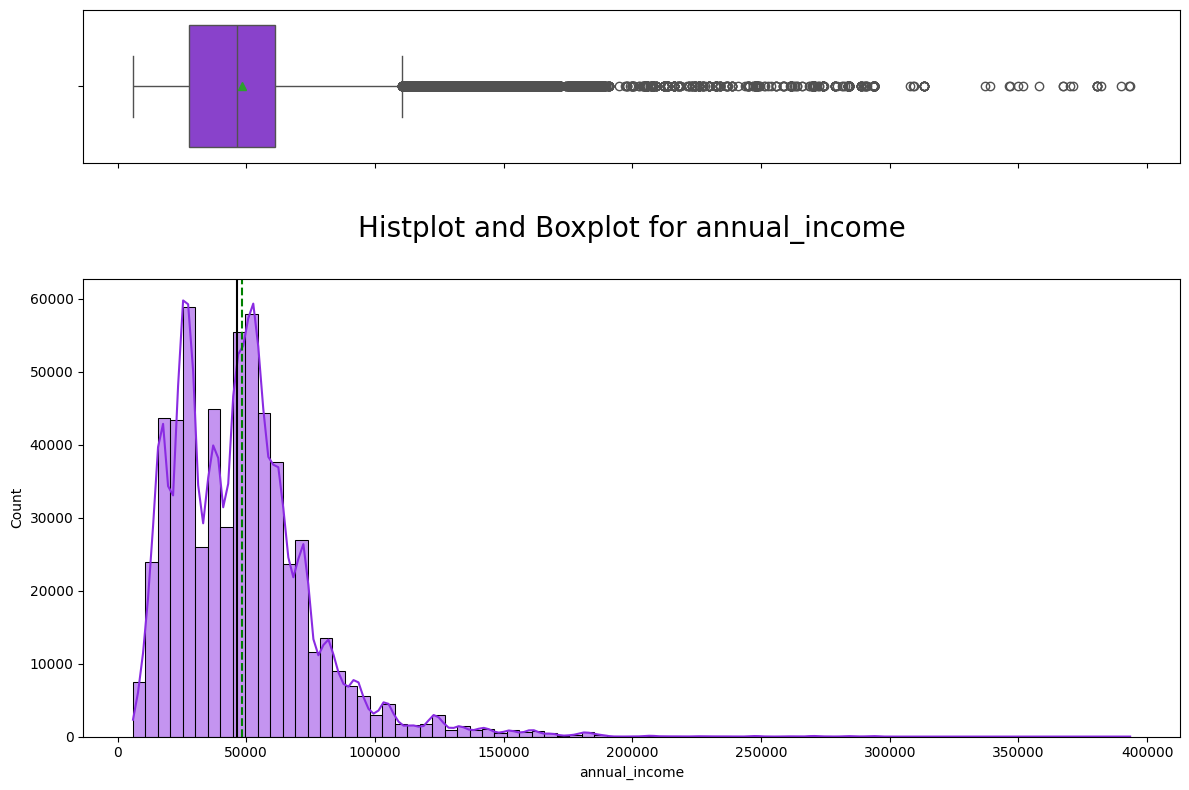


debt_to_income_ratio = "1.407" skewness value



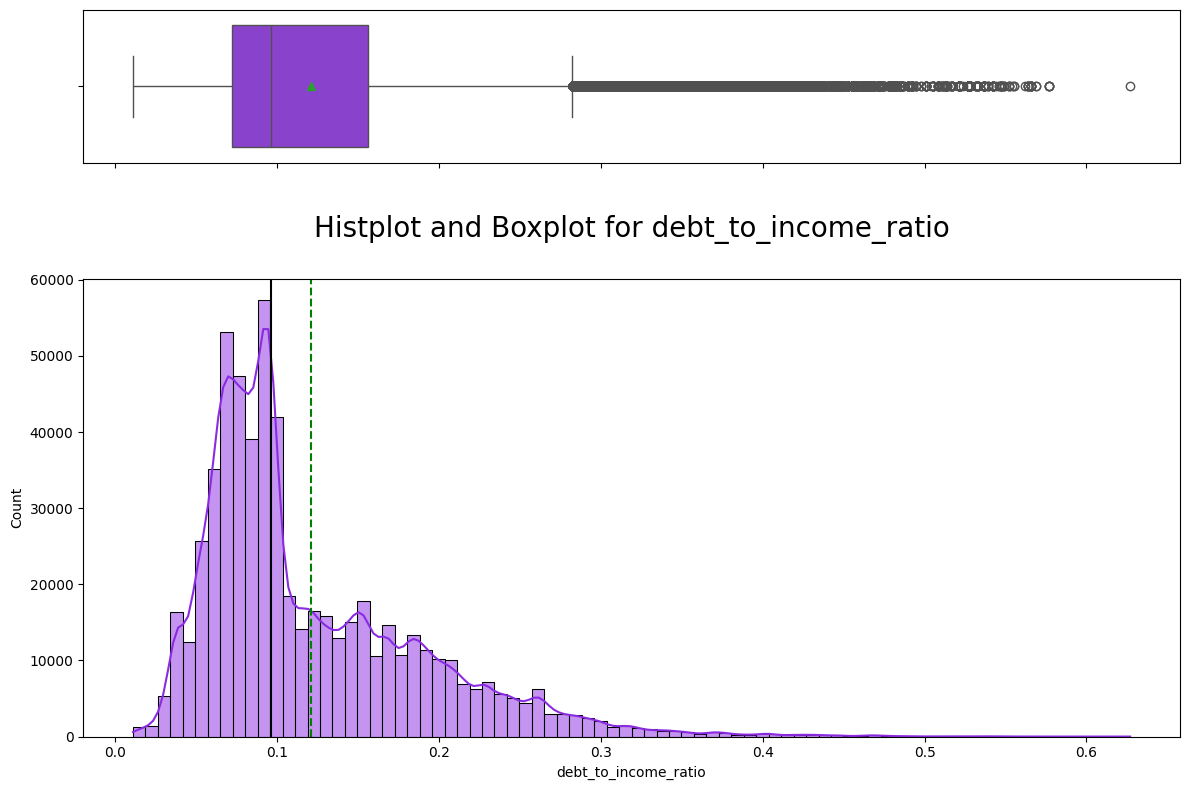


credit_score = "-0.167" skewness value



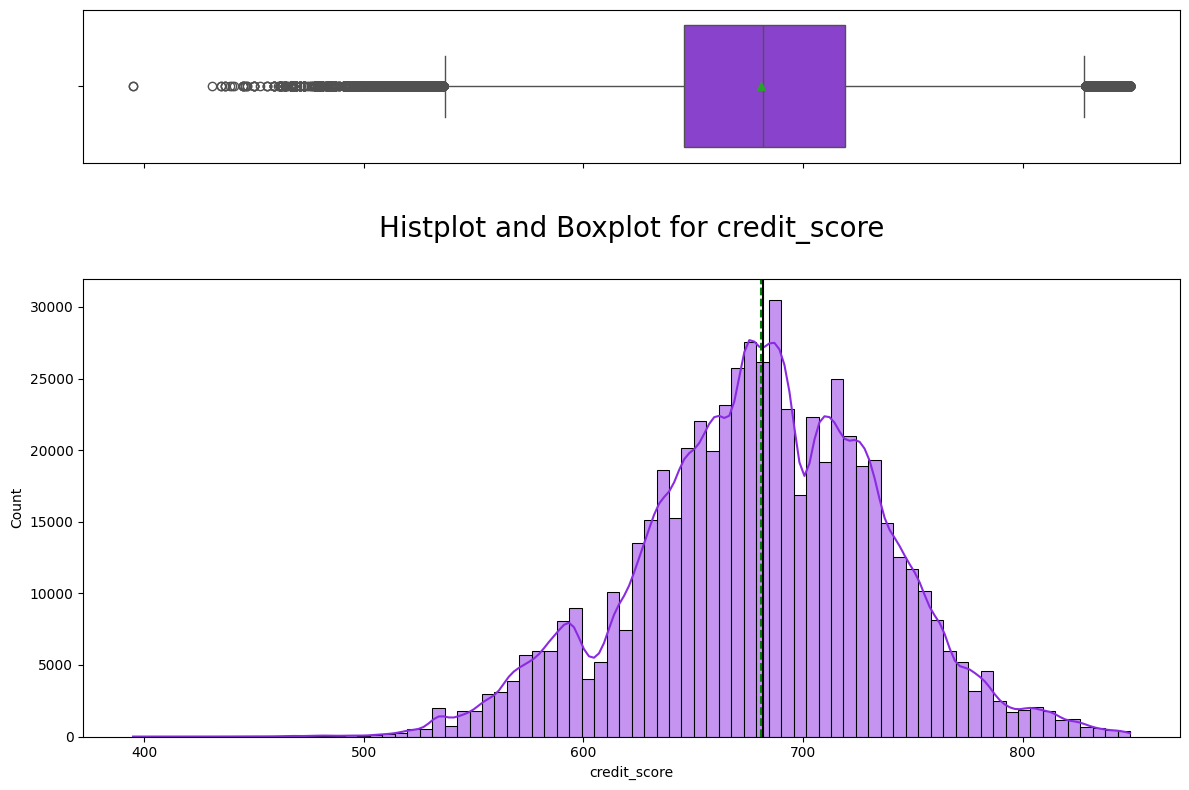


loan_amount = "0.207" skewness value



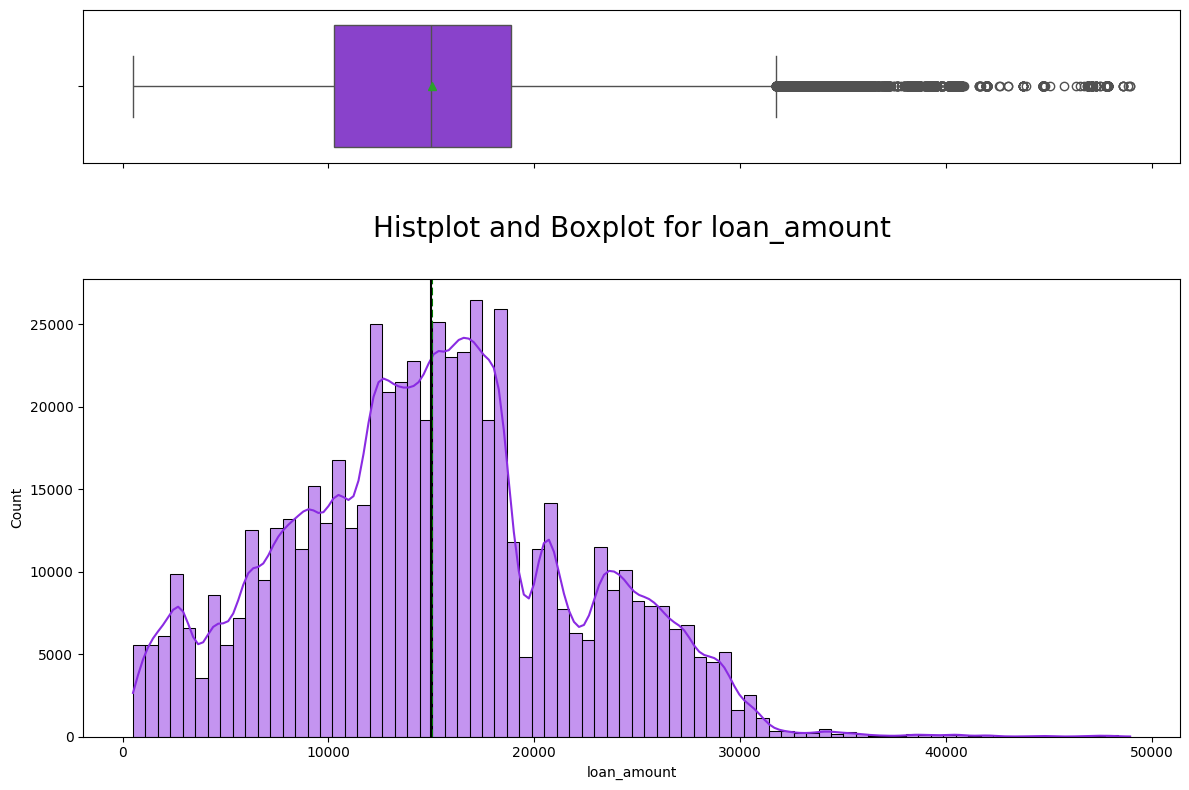


interest_rate = "0.050" skewness value



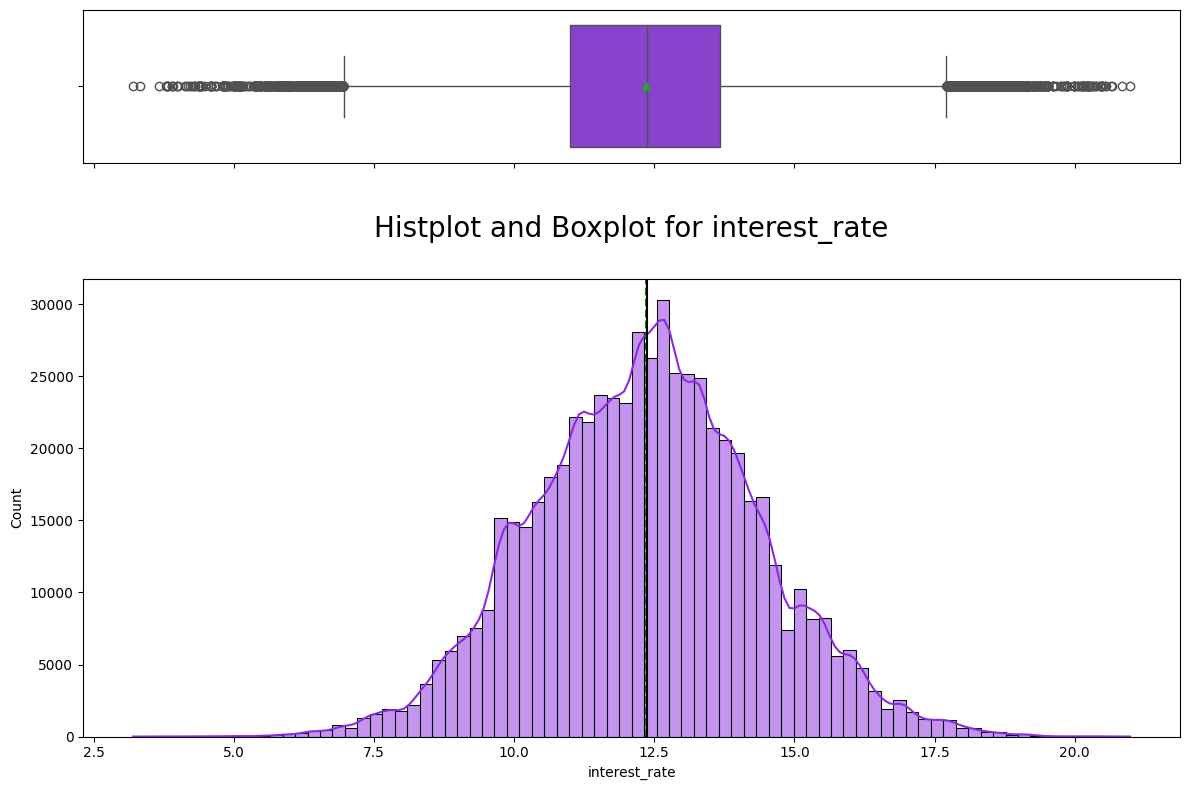


loan_paid_back = "-1.491" skewness value



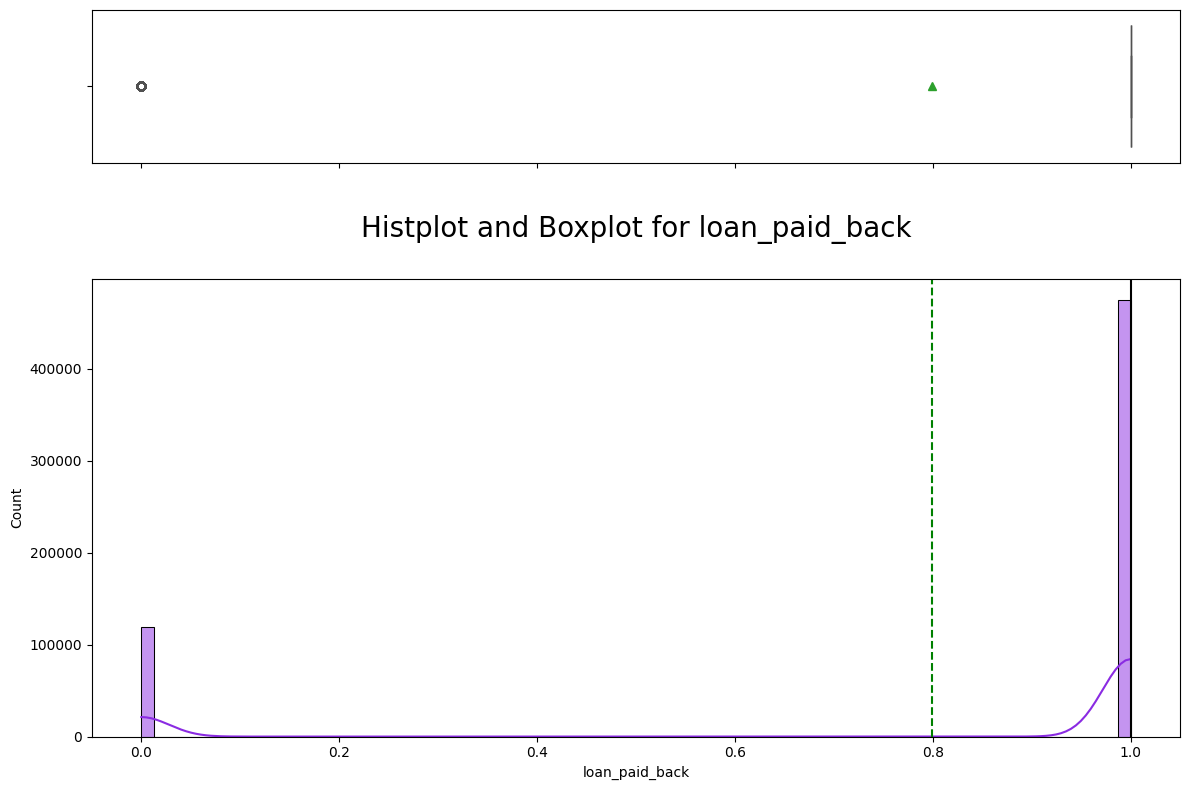

In [22]:
for col in num_features:
    histogram_boxplot(train_df, col)

## Correlation Analysis

#### Temporarily encode all categorical features to visualize correlation

In [23]:
train_df.head(10)

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0
6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
7,45953.31,0.100,654,10111.62,12.82,Female,Married,High School,Employed,Home,D1,1.0
8,30592.29,0.132,713,7522.36,9.48,Male,Married,Bachelor's,Employed,Education,C5,1.0
9,17342.45,0.121,548,9653.48,16.04,Female,Married,Bachelor's,Self-employed,Vacation,F1,1.0


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def temp_encode_for_heatmap(df, method="pearson", figsize=(10, 8), cmap="coolwarm", annot=False):
    """
    Temporarily encodes categorical columns for correlation heatmap visualization.

    Parameters:
    -----------
    df : pandas.DataFrame
    method : str, optional
        Correlation method: 'pearson', 'spearman', or 'kendall'. Default is 'pearson'.
    figsize : tuple, optional
        Size of the heatmap figure.
    cmap : str, optional
        Color map for the heatmap.
    annot : bool, optional
        Whether to display correlation values on the heatmap.

    Returns:
    --------
    corr : pandas.DataFrame
        The computed correlation matrix.
    """

    df_temp = df.copy()  # temporary copy

    df_temp['employment_status'] = df_temp['employment_status'].map({
    'Unemployed': 0,
    'Self-employed': 1,
    'Employed': 2
    })

    
    df_temp['education_level'] = df_temp['education_level'].map({
        "High School": 0,
        "Bachelor's": 1,
        "Master's": 2,
        "PhD": 3

    })

    # Encode categorical columns temporarily
    label_encoders = {}
    for col in df_temp.select_dtypes(include=["object"]).columns:
        if col not in ['employment_status', 'education_level']:
            le = LabelEncoder()
            df_temp[col] = le.fit_transform(df_temp[col].astype(str))
            label_encoders[col] = le

    # Compute correlation matrix
    corr = df_temp.corr(method=method)

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr, cmap=cmap, annot=annot, fmt=".2f", linewidths=0.5)
    plt.title(f"{method.title()} Correlation Heatmap", fontsize=14)
    plt.show()

    return corr


In [25]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


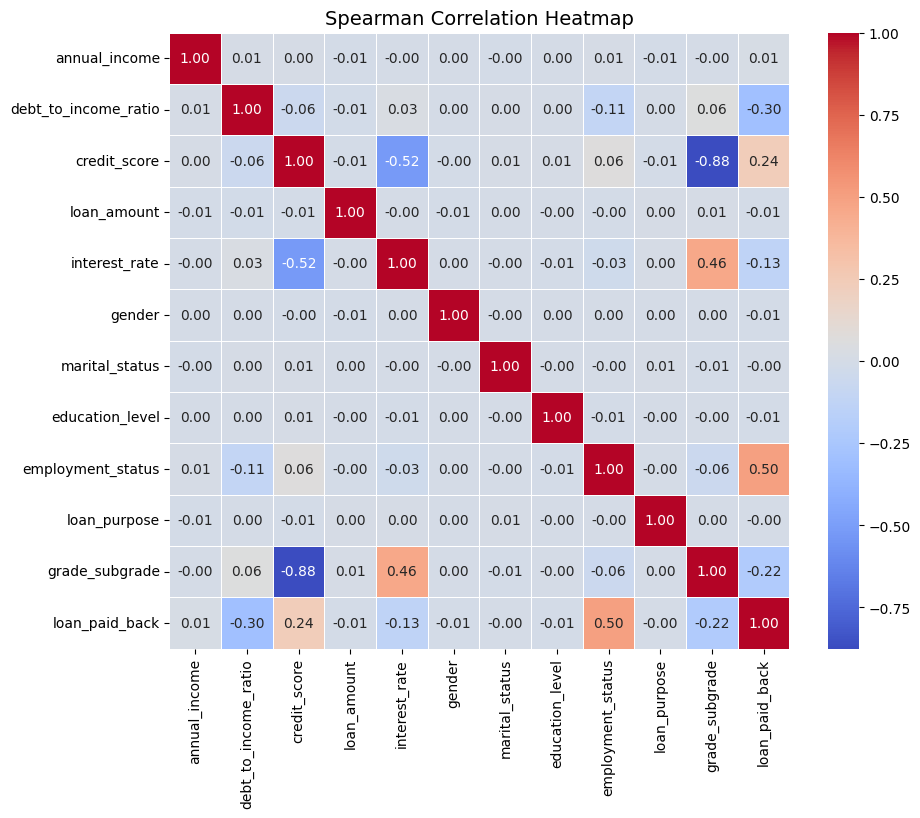

In [26]:
corr_matrix = temp_encode_for_heatmap(train_df, method="spearman", annot=True)


In [27]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


#### **EDA REPORT SUMMARY**
This report focuses on revealing features that are promising in aiding our model predictions

1. Histogram (KDE) and BoxPlot - Reveals the presence of ouliers and skewness in most numerical features.
    - `annual_income` and `debt_to_income_ratio` plot reveals a strong right-skewed distribution with several outliers.
    - These outliers need to be handled to enhance our model performance.

2. Spearman's Correlation Heatmap:
    - This reveals that most values (correlations) are close to 0, implying a weak relationship between many variables (features).

    - However a few features show strong correlation and should be given attention.
       

3. Strongest Predictors of Loan Repayment
    - `employment_status (-0.585)` → Main determinant
    - `debt_to_income_ratio (- 0.336)` → Reflects Payment Capacity.
    - `credit_score (+0.235)` → shows the reliability of a borrower.
    - `grade_subgrade` has a high correlation with credit score and would be dropped off to prevent redundancy.

4. Weak Predictors:
    - `annual_income`, `loan_amount`, `gender`, `marital_status`, `education_level`, `loan_purpose` → These have no linear correlation with the target variable.

## Data Preprocessing

In [28]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [29]:
# Power transform skewed columns
power_transform(train_df[["annual_income", "debt_to_income_ratio"]], method='yeo-johnson')
train_df.head()

# train_df = train_df.drop(columns=["grade_subgrade"])
# test_df = test_df.drop(columns=["grade_subgrade"])





,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [30]:
# num_features, cat_features = num_cat_split(train_df)

In [31]:
cat_features

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [32]:
num_features

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'loan_paid_back'],
      dtype='object')

## Feature Encoding

In [33]:
def convert_dtype(df):
    df = df.copy()
    df = df.astype({col: "category" for col in df.select_dtypes("object").columns})
    return df


train_df_preproc = convert_dtype(train_df)
test_df_preproc = convert_dtype(test_df)

In [34]:
def encode_categorical(tr_df, ts_df, cols):
    encoders = {}
    for col in cols:
        le = LabelEncoder()
        tr_df[col] = le.fit_transform(tr_df[col].astype(str))
        ts_df[col] = le.transform(ts_df[col].astype(str).map(
            lambda x: x if x in le.classes_ else le.classes_[0]
        ))
        encoders[col] = le
    return tr_df, ts_df, encoders

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder



train, test, encoders = encode_categorical(train_df_preproc, test_df_preproc, cat_features)




## Baseline Model

In [36]:
from sklearn.model_selection import train_test_split

# Define X and y
X = train.drop(columns=["loan_paid_back"])
y = train["loan_paid_back"]

scaler = StandardScaler()

num_features = num_features.drop('loan_paid_back', errors='ignore')

X[num_features] = scaler.fit_transform(X[num_features])


# Split into train/test (if not already split)
x_train, x_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

# Predict
y_pred = log_reg.predict(x_val)

# Evaluate
print("=== Logistic Regression Baseline ===")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


=== Logistic Regression Baseline ===
Accuracy: 0.8905

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.60      0.69     23900
         1.0       0.91      0.96      0.93     94899

    accuracy                           0.89    118799
   macro avg       0.86      0.78      0.81    118799
weighted avg       0.89      0.89      0.88    118799


Confusion Matrix:
[[14399  9501]
 [ 3503 91396]]


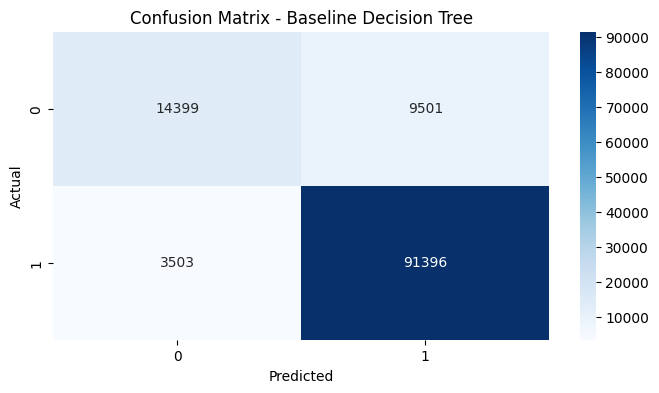

In [38]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Let Preview the major contributors to the performance

In [39]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
2,credit_score,0.826534
7,education_level,0.041662
0,annual_income,0.020076
10,grade_subgrade,0.016342
6,marital_status,0.008321
9,loan_purpose,0.006896
3,loan_amount,-0.002476
4,interest_rate,-0.038636
5,gender,-0.044560
1,debt_to_income_ratio,-0.854102


## Model Fitting